# Video plots

In [5]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

## Color definition

In [6]:
signal_color = {
    "Speed": "#EFC859",
    "Acceleration": "#B158A4",
    "TimeHeadway": "#74C2B8",
}

imf_color = {
    0: "#4C78A8",
    1: "#F58518",
    2: "#E45756",
    3: "#72B7B2",
    4: "#54A24B",
    5: "#EECA3B",
    6: "#B279A2",
    7: "#FF9DA6",
    8: "#BAB0AC",
}

units = {
    "Speed": "[m/s]",
    "Acceleration": "[m/s^2]",
    "TimeHeadway": "[]",
}


matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Times New Roman'
matplotlib.rcParams['mathtext.it'] = 'Times New Roman:italic'
matplotlib.rcParams['mathtext.bf'] = 'Times New Roman:bold'

## Signal plots

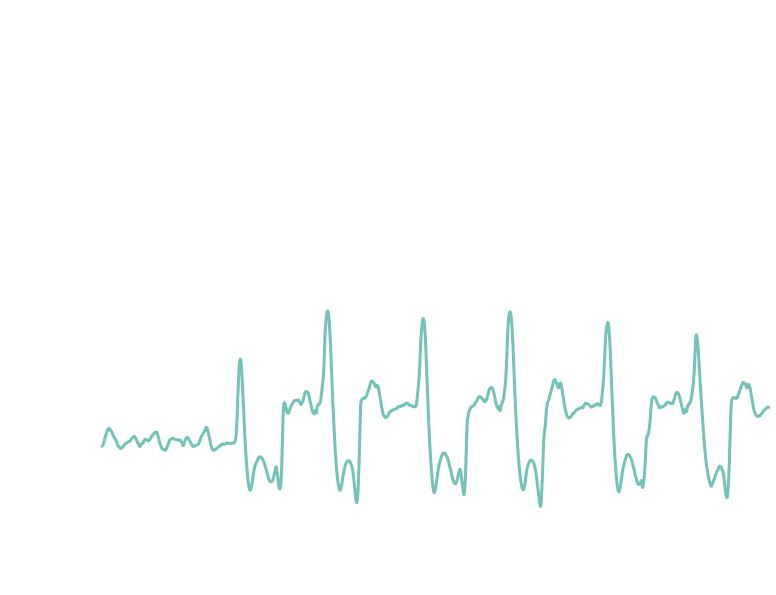

In [7]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False, "figure.figsize":(12, 9), 'text.color': 'white', 'xtick.color': 'white', 'ytick.color': 'white', 'axes.facecolor':'white', 'axes.edgecolor':'white', 'axes.labelcolor':'white'}

def plot_signal(signal: str, mode: str):
    if mode == "ACC":
        data = pd.read_csv("data/data2plotACC.csv")
    else:
        data = pd.read_csv("data/data2plotHV.csv")
    
    data["Time"] = np.arange(0, len(data)/10, 0.1)
    
    sns.set_theme(style="ticks", rc=custom_params, font="Times New Roman", font_scale=3)
        
    ax = sns.lineplot(data=data, x="Time", y=signal, color=signal_color[signal], linewidth = 3)
    
    if signal == "TimeHeadway":
        ax.set(xlabel="Time $[s]$", ylabel=f"Time Headway ${units[signal]}$")
    else:
        ax.set(xlabel="Time $[s]$", ylabel=f"{signal} ${units[signal]}$")

    if signal == "Speed":
        plt.ylim(10, 30, 5)
    elif signal == "Acceleration":
        plt.ylim(-2, 3, 1)
    elif signal == "TimeHeadway":
        plt.ylim(1, 4, 0.5)
    
    plt.xlim(0, 1100, 250)
    
    fig = ax.get_figure()
    
    ax.plot()
    
    fig.savefig(f"{signal}_{mode}.png", transparent=True)
    
    
plot_signal("TimeHeadway", "ACC")

## IMF plots by signal

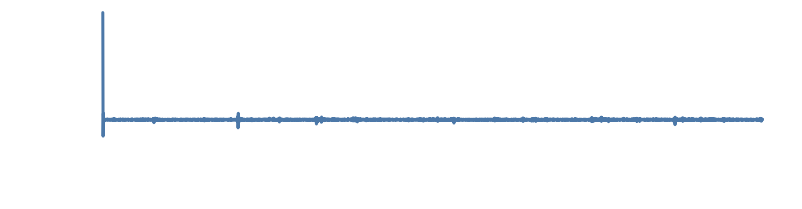

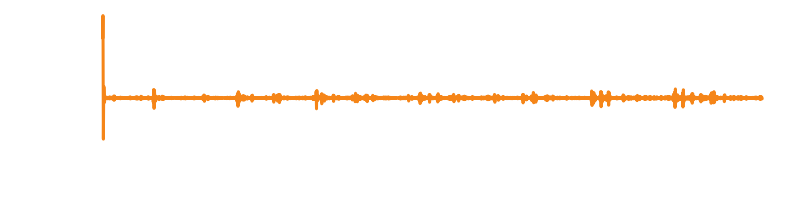

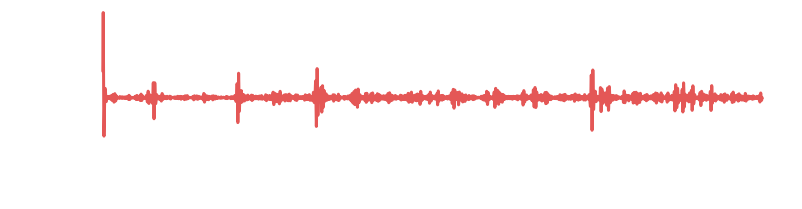

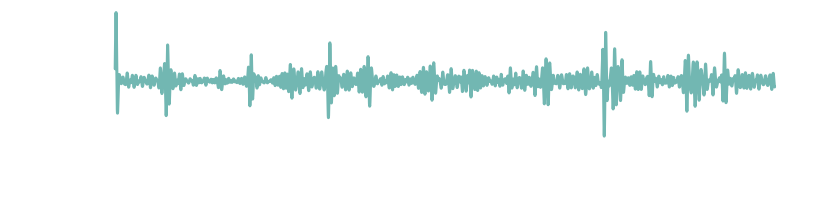

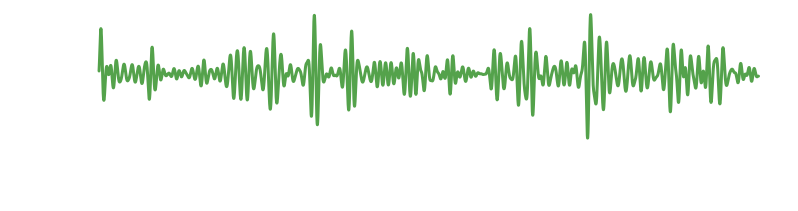

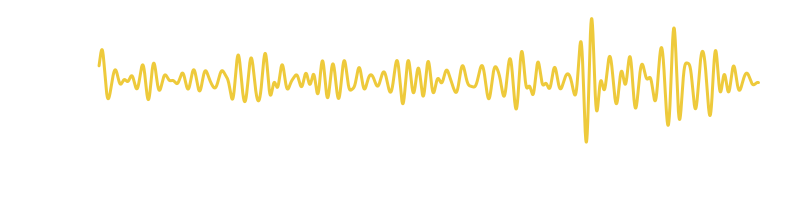

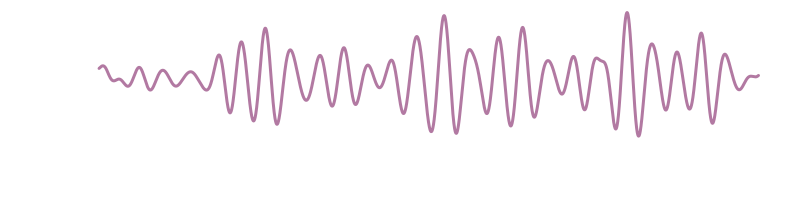

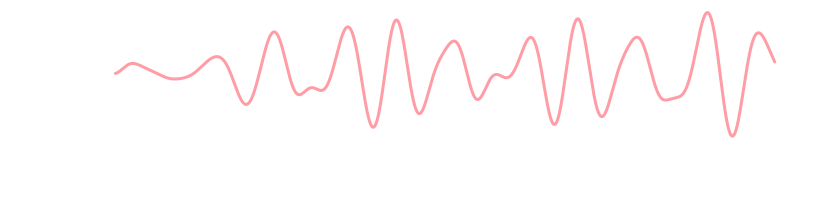

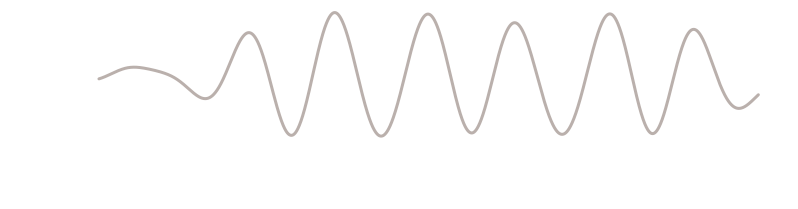

In [28]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False, "figure.figsize":(13, 2.5), 'text.color': 'white', 'xtick.color': 'white', 'ytick.color': 'white', 'axes.facecolor':'white', 'axes.edgecolor':'white', 'axes.labelcolor':'white'}

def plot_imf(signal: str, mode: str):
    if mode == "ACC":
        data = pd.read_csv("data/data2plotACC.csv")
    else:
        data = pd.read_csv("data/data2plotHV.csv")
    
    data["Time"] = np.arange(0, len(data)/10, 0.1)
    
    
    for n in range(0, 9):
        
        plt.figure()
        
        sns.set_theme(style="ticks", rc=custom_params, font="Times New Roman", font_scale=2)
        
        ax = sns.lineplot(data=data, x="Time", y=f"{signal}-imf-{n}", color=imf_color[n], linewidth = 3)
        
        ax.set(xlabel="Time $[s]$", ylabel=f"IMF-{n+1}")
    
        fig = ax.get_figure()
    
        ax.plot()
    
        fig.savefig(f"{signal}-{mode}-IMF-{n+1}.png", transparent=True)
    
    
plot_imf("Speed", "HV")